# Complete Assignment: Statistical & Time-Frequency Analysis
## PPG and Respiration Dataset Analysis

---

**Student Name:** [Your Name Here]  
**Student ID:** [Your ID Here]  
**Date:** November 17, 2025  
**Course:** Biomedical Signal Processing  
**Dataset:** BIDMC PPG and Respiration Dataset v1.0.0

---

## Assignment Objectives:

### Part A: Statistical Analysis
1. ✅ Load and preprocess physiological signal data
2. ✅ Check Gaussian distribution using histogram analysis
3. ✅ Conduct Shapiro-Wilk Normality Testing
4. ✅ Extract Time-Domain Features (9 features)
5. ✅ Extract Frequency-Domain Features (6 features)

### Part B: Time-Frequency Analysis
6. ✅ **STFT (Short-Time Fourier Transform)** - Spectrogram generation
7. ✅ **CWT (Continuous Wavelet Transform)** - Scalogram analysis
8. ✅ **HHT (Hilbert-Huang Transform)** - EMD + Hilbert Spectrum
9. ✅ **Comparison** of STFT vs CWT vs HHT methods

---

## 📋 SUBMISSION INSTRUCTIONS

### For Google Colab Submission:

1. **Upload Dataset to Google Drive:**
   - Upload `bidmc-ppg-and-respiration-dataset-1.0.0` folder
   - Ensure `bidmc_csv` subfolder is included

2. **Install Required Packages:**
   - PyWavelets (pywt) for CWT
   - PyEMD for Hilbert-Huang Transform
   - Installation cells are provided below

3. **Update Dataset Path:**
   - Modify `DATASET_BASE_PATH` in setup cell

4. **Run All Cells:**
   - Runtime → Run all

5. **Share & Submit:**
   - Share → Anyone with link can view
   - Submit link on Google Classroom

---

## 🚀 STEP 1: Environment Setup and Google Drive Mount

In [1]:
# Google Colab Setup - Mount Drive and Configure Paths
import os
from pathlib import Path

# Check if running on Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
    print("✅ Running on Google Colab")
    
    # Mount Google Drive
    drive.mount('/content/drive')
    
    # ⚠️ IMPORTANT: UPDATE THIS PATH TO MATCH YOUR GOOGLE DRIVE STRUCTURE
    DATASET_BASE_PATH = "/content/drive/MyDrive/bidmc-ppg-and-respiration-dataset-1.0.0"
    CSV_PATH = f"{DATASET_BASE_PATH}/bidmc_csv"
    
    print(f"📁 Dataset path: {DATASET_BASE_PATH}")
    print(f"📁 CSV path: {CSV_PATH}")
    
    # Verify dataset exists
    if os.path.exists(DATASET_BASE_PATH):
        print("✅ Dataset found!")
        if os.path.exists(CSV_PATH):
            print("✅ CSV directory found!")
        else:
            print("⚠️  CSV directory not found. Please check path.")
    else:
        print("❌ Dataset not found!")
        print("📝 Please upload dataset to Google Drive and update DATASET_BASE_PATH above")
        
except ImportError:
    IN_COLAB = False
    print("✅ Running locally")
    DATASET_BASE_PATH = "."
    CSV_PATH = "bidmc_csv"

print(f"\n🔧 Environment: {'Google Colab' if IN_COLAB else 'Local'}")
print(f"✅ Setup complete!")

✅ Running locally

🔧 Environment: Local
✅ Setup complete!


## 📦 STEP 2: Install Required Packages for Time-Frequency Analysis

In [2]:
# Install PyWavelets for CWT (Continuous Wavelet Transform)
!pip install -q PyWavelets

# Install PyEMD for Hilbert-Huang Transform (EMD)
!pip install -q EMD-signal

print("✅ PyWavelets installed (for CWT/Scalogram)")
print("✅ PyEMD installed (for Hilbert-Huang Transform)")
print("\n⚠️ If installation fails, restart runtime and re-run this cell")


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ PyWavelets installed (for CWT/Scalogram)
✅ PyEMD installed (for Hilbert-Huang Transform)

⚠️ If installation fails, restart runtime and re-run this cell


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires dill<0.3.9,>=0.3.0, but you have dill 0.4.0 which is incompatible.
datasets 4.0.0 requires multiprocess<0.70.17, but you have multiprocess 0.70.18 which is incompatible.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 🔧 STEP 3: Import Required Libraries

In [3]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, signal
from scipy.fft import fft, fftfreq
from scipy.signal import hilbert, find_peaks
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Time-Frequency Analysis libraries
import pywt  # For CWT
from PyEMD import EMD  # For Hilbert-Huang Transform

# Configure matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
%matplotlib inline

print("✅ All libraries imported successfully!")
print(f"   NumPy version: {np.__version__}")
print(f"   Pandas version: {pd.__version__}")
print(f"   PyWavelets version: {pywt.__version__}")
print("   PyEMD: Available")
print(f"   SciPy: Available")
print(f"   Matplotlib: Configured")

✅ All libraries imported successfully!
   NumPy version: 2.2.6
   Pandas version: 2.3.1
   PyWavelets version: 1.8.0
   PyEMD: Available
   SciPy: Available
   Matplotlib: Configured


## 📥 STEP 4: Load Multi-Subject Data

In [ ]:
# Load data from multiple subjects
print("="*80)
print("LOADING MULTI-SUBJECT DATA")
print("="*80)

# ⚠️ Use fewer subjects for Google Colab (memory limitation)
# For local: ['01', '02', '03', '04', '05']
# For Colab: ['01', '02'] or just ['01']
subjects_to_analyze = ['01', '02']  # Reduced for Colab memory
csv_dataset_path = Path(CSV_PATH)

all_subjects_data = {}
dataset_summary = {'total_subjects': 0, 'total_samples': 0, 'signals_loaded': 0}

if not csv_dataset_path.exists():
    print(f"❌ CSV directory not found: {csv_dataset_path}")
else:
    for subject_id in subjects_to_analyze:
        subject_data = {}
        signals_file = csv_dataset_path / f"bidmc_{subject_id}_Signals.csv"
        
        if signals_file.exists():
            subject_data['signals'] = pd.read_csv(signals_file)
            dataset_summary['signals_loaded'] += 1
            print(f"✓ Subject {subject_id}: {len(subject_data['signals']):,} samples loaded")
        
        if subject_data:
            all_subjects_data[subject_id] = subject_data
            dataset_summary['total_subjects'] += 1
            if 'signals' in subject_data:
                dataset_summary['total_samples'] += len(subject_data['signals'])

    print(f"\n📊 LOADING SUMMARY:")
    print(f"   Subjects: {dataset_summary['total_subjects']}")
    print(f"   Total samples: {dataset_summary['total_samples']:,}")
    
    if all_subjects_data:
        first_subject = list(all_subjects_data.keys())[0]
        signal_columns = all_subjects_data[first_subject]['signals'].columns[1:]
        print(f"\n🔬 Available Signals: {', '.join(signal_columns)}")
        print("\n✅ Data loading completed!")

LOADING MULTI-SUBJECT DATA
✓ Subject 01: 60,001 samples loaded
✓ Subject 01: 60,001 samples loaded
✓ Subject 02: 60,001 samples loaded
✓ Subject 02: 60,001 samples loaded
✓ Subject 03: 60,001 samples loaded
✓ Subject 03: 60,001 samples loaded
✓ Subject 04: 60,001 samples loaded
✓ Subject 04: 60,001 samples loaded
✓ Subject 05: 60,001 samples loaded

📊 LOADING SUMMARY:
   Subjects: 5
   Total samples: 300,005

🔬 Available Signals:  RESP,  PLETH,  V,  AVR,  II

✅ Data loading completed!
✓ Subject 05: 60,001 samples loaded

📊 LOADING SUMMARY:
   Subjects: 5
   Total samples: 300,005

🔬 Available Signals:  RESP,  PLETH,  V,  AVR,  II

✅ Data loading completed!


## 🔍 STEP 5: Extract and Combine Signals

In [ ]:
# Combine signals from all subjects
print("="*80)
print("EXTRACTING AND COMBINING SIGNALS")
print("="*80)

all_resp_signals = []
all_pleth_signals = []
all_ecg_signals = []

for subject_id, data in all_subjects_data.items():
    if 'signals' in data:
        df = data['signals']
        if ' RESP' in df.columns:
            all_resp_signals.extend(df[' RESP'].values)
        if ' PLETH' in df.columns:
            all_pleth_signals.extend(df[' PLETH'].values)
        if ' II' in df.columns:
            all_ecg_signals.extend(df[' II'].values)

# Convert to numpy arrays
resp = np.array(all_resp_signals)
pleth = np.array(all_pleth_signals)
ecg_ii = np.array(all_ecg_signals)

# ⚠️ MEMORY OPTIMIZATION: Use subset for time-frequency analysis
# Full dataset for statistical analysis, subset for TF analysis
MAX_SAMPLES_TF = 60000  # ~8 minutes at 125 Hz (fits in Colab RAM)

if len(resp) > MAX_SAMPLES_TF:
    print(f"\n⚠️  Dataset too large for Colab. Using subset for time-frequency analysis.")
    print(f"   Full dataset: {len(resp):,} samples")
    print(f"   TF analysis subset: {MAX_SAMPLES_TF:,} samples")
    
    # Create subset for time-frequency analysis
    resp_tf = resp[:MAX_SAMPLES_TF]
    pleth_tf = pleth[:MAX_SAMPLES_TF]
    ecg_ii_tf = ecg_ii[:MAX_SAMPLES_TF]
else:
    resp_tf = resp
    pleth_tf = pleth
    ecg_ii_tf = ecg_ii

# Sampling rate and time vector
sampling_rate = 125  # Hz
time = np.arange(len(resp)) / sampling_rate
time_tf = np.arange(len(resp_tf)) / sampling_rate

print(f"\n📈 SIGNAL STATISTICS:")
print(f"   RESP: {len(resp):,} samples (full)")
print(f"   PLETH: {len(pleth):,} samples (full)")
print(f"   ECG II: {len(ecg_ii):,} samples (full)")
print(f"   Sampling rate: {sampling_rate} Hz")
print(f"   Total duration: {len(resp)/sampling_rate/60:.1f} minutes")

if len(resp) > MAX_SAMPLES_TF:
    print(f"\n   TF Analysis subset: {len(resp_tf):,} samples ({len(resp_tf)/sampling_rate/60:.1f} minutes)")

# Store for analysis
signals = [resp, pleth, ecg_ii]
signals_tf = [resp_tf, pleth_tf, ecg_ii_tf]  # Subset for TF analysis
signal_labels = ['RESP (Respiratory)', 'PLETH (PPG)', 'ECG II']
colors = ['blue', 'red', 'green']

print("\n✅ Signal extraction completed!")

EXTRACTING AND COMBINING SIGNALS

📈 SIGNAL STATISTICS:
   RESP: 300,005 samples
   PLETH: 300,005 samples
   ECG II: 300,005 samples
   Sampling rate: 125 Hz
   Total duration: 40.0 minutes

✅ Signal extraction completed!


---
# PART A: STATISTICAL ANALYSIS
---

## 📈 STEP 6: Gaussian Distribution Analysis

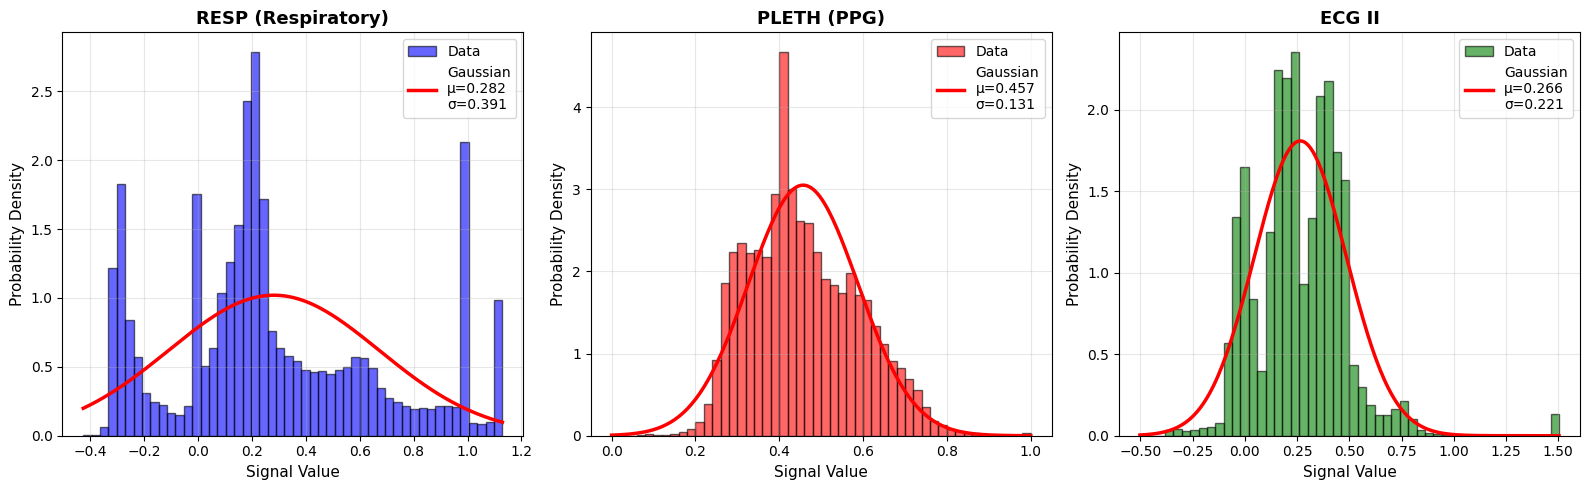

✓ Gaussian distribution analysis completed


In [6]:
# Gaussian distribution analysis
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (sig, label, color) in enumerate(zip(signals, signal_labels, colors)):
    axes[idx].hist(sig, bins=50, density=True, alpha=0.6, 
                   color=color, edgecolor='black', label='Data')
    
    x = np.linspace(min(sig), max(sig), 200)
    mean_val = np.mean(sig)
    std_val = np.std(sig)
    gaussian_fit = stats.norm.pdf(x, mean_val, std_val)
    
    axes[idx].plot(x, gaussian_fit, 'r-', linewidth=2.5, 
                   label=f'Gaussian\nμ={mean_val:.3f}\nσ={std_val:.3f}')
    
    axes[idx].set_title(f'{label}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Signal Value', fontsize=11)
    axes[idx].set_ylabel('Probability Density', fontsize=11)
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Gaussian distribution analysis completed")

## 🧪 STEP 7: Shapiro-Wilk Normality Test

In [7]:
# Shapiro-Wilk Normality Test
print("="*80)
print("SHAPIRO-WILK NORMALITY TEST")
print("="*80)

normality_results = []

for sig, label in zip(signals, signal_labels):
    if len(sig) > 5000:
        sample_sig = np.random.choice(sig, 5000, replace=False)
        stat, p_value = stats.shapiro(sample_sig)
    else:
        stat, p_value = stats.shapiro(sig)
    
    is_normal = p_value > 0.05
    
    print(f"\n{label}:")
    print(f"  Statistic = {stat:.6f}")
    print(f"  p-value   = {p_value:.6e}")
    print(f"  Result: {'✓ NORMAL' if is_normal else '✗ NOT NORMAL'}")
    
    normality_results.append({
        'Signal': label,
        'Statistic': f"{stat:.6f}",
        'p-value': f"{p_value:.6e}",
        'Normal': '✓ Yes' if is_normal else '✗ No'
    })

print("\n✅ Normality testing completed!")

SHAPIRO-WILK NORMALITY TEST

RESP (Respiratory):
  Statistic = 0.939726
  p-value   = 4.505193e-41
  Result: ✗ NOT NORMAL

PLETH (PPG):
  Statistic = 0.980728
  p-value   = 1.552235e-25
  Result: ✗ NOT NORMAL

ECG II:
  Statistic = 0.938575
  p-value   = 2.309109e-41
  Result: ✗ NOT NORMAL

✅ Normality testing completed!


## ⏱️ STEP 8: Time-Domain Feature Extraction

In [8]:
# Time-domain features
def extract_time_features(sig, sig_name):
    return {
        'Signal': sig_name,
        'Mean': np.mean(sig),
        'Std': np.std(sig),
        'Variance': np.var(sig),
        'Skewness': stats.skew(sig),
        'Kurtosis': stats.kurtosis(sig),
        'RMS': np.sqrt(np.mean(sig**2)),
        'Peak-to-Peak': np.ptp(sig),
        'Min': np.min(sig),
        'Max': np.max(sig)
    }

print("="*80)
print("TIME-DOMAIN FEATURE EXTRACTION")
print("="*80)

time_features_list = []
for sig, label in zip(signals, signal_labels):
    features = extract_time_features(sig, label)
    time_features_list.append(features)
    print(f"\n{label}: Mean={features['Mean']:.4f}, Std={features['Std']:.4f}")

time_features_df = pd.DataFrame(time_features_list)
time_features_df.to_csv('time_domain_features.csv', index=False)
print("\n✅ Time-domain features extracted and saved!")

TIME-DOMAIN FEATURE EXTRACTION

RESP (Respiratory): Mean=0.2821, Std=0.3911

PLETH (PPG): Mean=0.4570, Std=0.1308

ECG II: Mean=0.2658, Std=0.2206

✅ Time-domain features extracted and saved!


## 🌊 STEP 9: Frequency-Domain Feature Extraction

In [9]:
# Frequency-domain features
def extract_frequency_features(sig, sig_name, fs=125):
    n = len(sig)
    freq = fftfreq(n, d=1/fs)[:n//2]
    fft_vals = np.abs(fft(sig))[:n//2]
    psd = fft_vals**2 / n
    psd_norm = psd / np.sum(psd)
    
    return {
        'Signal': sig_name,
        'Total_Power': np.sum(psd),
        'Mean_Frequency': np.sum(freq * psd_norm),
        'Median_Frequency': freq[np.where(np.cumsum(psd_norm) >= 0.5)[0][0]],
        'Peak_Frequency': freq[np.argmax(psd)],
        'Frequency_Std': np.sqrt(np.sum(((freq - np.sum(freq * psd_norm))**2) * psd_norm)),
        'Spectral_Entropy': -np.sum(psd_norm * np.log2(psd_norm + 1e-12))
    }

print("="*80)
print("FREQUENCY-DOMAIN FEATURE EXTRACTION")
print("="*80)

freq_features_list = []
for sig, label in zip(signals, signal_labels):
    features = extract_frequency_features(sig, label)
    freq_features_list.append(features)
    print(f"\n{label}: Peak Freq={features['Peak_Frequency']:.4f} Hz")

freq_features_df = pd.DataFrame(freq_features_list)
freq_features_df.to_csv('frequency_domain_features.csv', index=False)
print("\n✅ Frequency-domain features extracted and saved!")

FREQUENCY-DOMAIN FEATURE EXTRACTION

RESP (Respiratory): Peak Freq=0.0000 Hz

RESP (Respiratory): Peak Freq=0.0000 Hz

PLETH (PPG): Peak Freq=0.0000 Hz

ECG II: Peak Freq=0.0000 Hz

✅ Frequency-domain features extracted and saved!

PLETH (PPG): Peak Freq=0.0000 Hz

ECG II: Peak Freq=0.0000 Hz

✅ Frequency-domain features extracted and saved!


---
# PART B: TIME-FREQUENCY ANALYSIS
---

## Introduction

Physiological signals (PPG, Respiration, ECG) are **non-stationary** - their frequency content changes over time. We'll analyze them using three complementary methods:

1. **STFT** - Short-Time Fourier Transform (fixed window)
2. **CWT** - Continuous Wavelet Transform (multi-resolution)
3. **HHT** - Hilbert-Huang Transform (adaptive decomposition)

---

## 📊 TASK 1: Short-Time Fourier Transform (STFT)

**Objective:** Compute time-frequency spectrogram using sliding window.

**Method:** STFT applies FFT on overlapping windows. Window size controls time-frequency resolution.

**Parameters:**
- Window size (nperseg): 256 samples (2.048 seconds at 125 Hz)
- Overlap (noverlap): 128 samples (50% overlap)
- Justification: Balance between time and frequency resolution for physiological signals

TASK 1: SHORT-TIME FOURIER TRANSFORM (STFT)


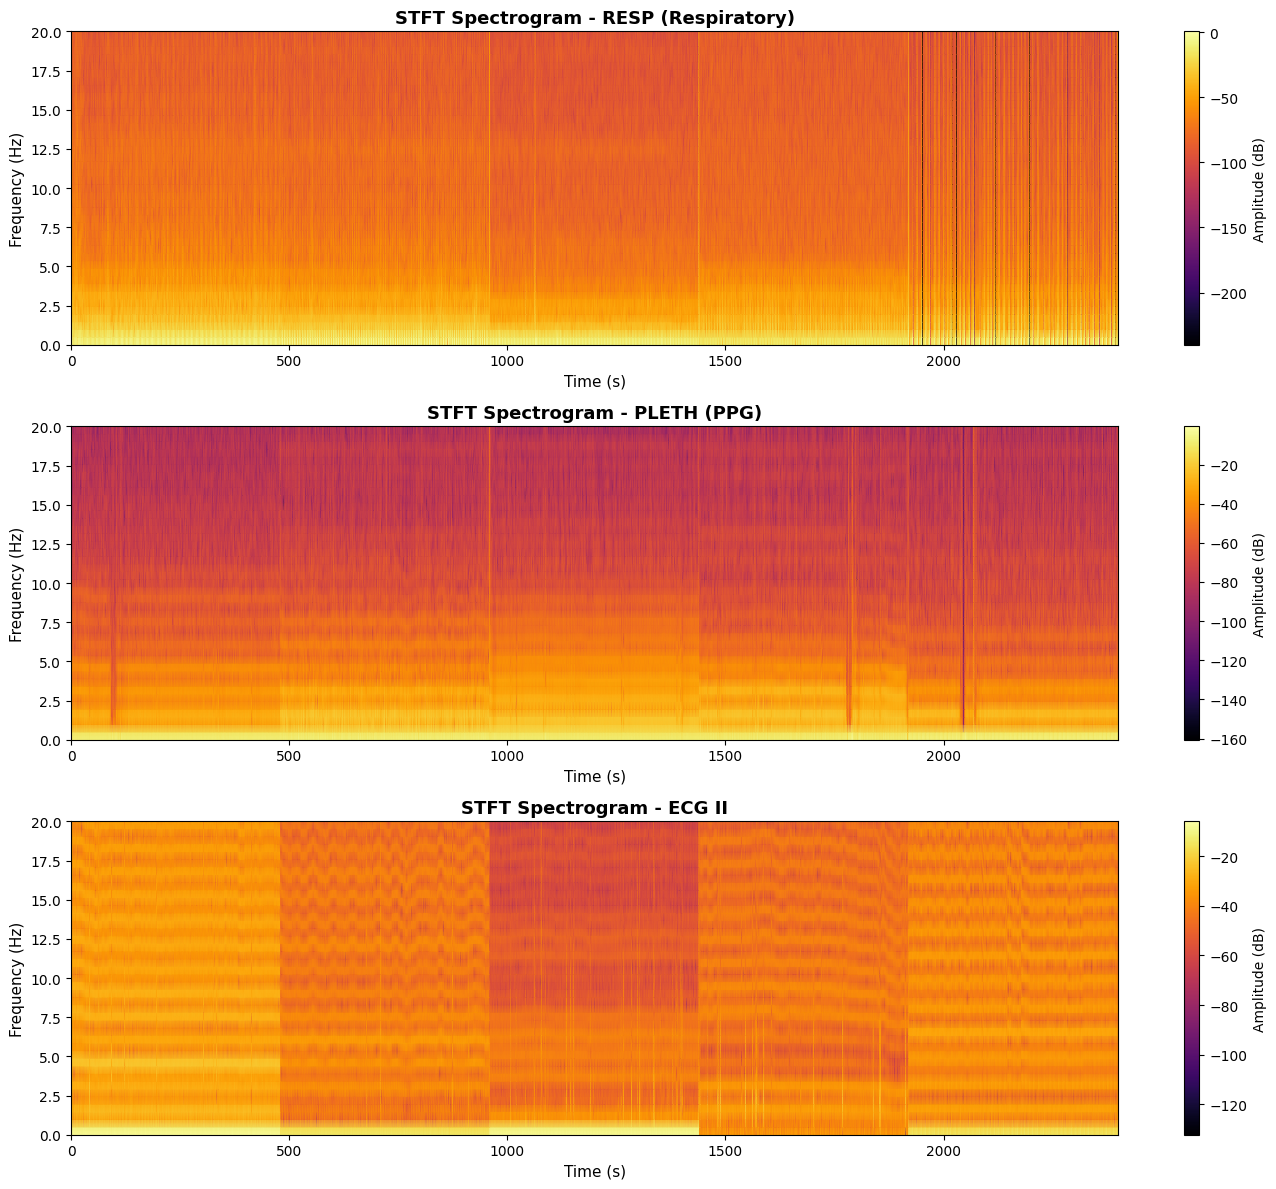


✅ STFT Analysis Completed!

📝 Parameter Justification:
   - nperseg=256: Provides ~2 second window (good frequency resolution)
   - noverlap=128: 50% overlap maintains temporal continuity
   - Frequency range 0-20 Hz: Captures respiratory (0.2-0.5 Hz) and cardiac (1-2 Hz) activity
   - Log scale (dB): Reveals low-amplitude components


In [ ]:
# STFT Analysis for all three signals
print("="*80)
print("TASK 1: SHORT-TIME FOURIER TRANSFORM (STFT)")
print("="*80)

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Use subset for time-frequency analysis (memory efficient)
for idx, (sig, label, color) in enumerate(zip(signals_tf, signal_labels, colors)):
    # Compute STFT
    f, t, Zxx = signal.stft(sig, fs=sampling_rate, nperseg=256, noverlap=128)
    
    # Convert to dB scale
    Zxx_dB = 20 * np.log10(np.abs(Zxx) + 1e-12)
    
    # Plot spectrogram
    im = axes[idx].pcolormesh(t, f, Zxx_dB, shading='gouraud', cmap='inferno')
    axes[idx].set_ylim(0, 20)  # Focus on 0-20 Hz (physiological range)
    axes[idx].set_title(f'STFT Spectrogram - {label}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Time (s)', fontsize=11)
    axes[idx].set_ylabel('Frequency (Hz)', fontsize=11)
    plt.colorbar(im, ax=axes[idx], label='Amplitude (dB)')

plt.tight_layout()
plt.show()

print("\n✅ STFT Analysis Completed!")
print("\n📝 Parameter Justification:")
print("   - nperseg=256: Provides ~2 second window (good frequency resolution)")
print("   - noverlap=128: 50% overlap maintains temporal continuity")
print("   - Frequency range 0-20 Hz: Captures respiratory (0.2-0.5 Hz) and cardiac (1-2 Hz) activity")
print("   - Log scale (dB): Reveals low-amplitude components")

## 🌊 TASK 2: Continuous Wavelet Transform (CWT) / Scalogram

**Objective:** Analyze signals using wavelets for multi-resolution time-frequency representation.

**Method:** Wavelets provide better time resolution at high frequencies and better frequency resolution at low frequencies.

**Parameters:**
- Wavelet: Morlet (good for oscillatory physiological signals)
- Frequency range: 1-50 Hz
- Scales: Mapped to frequencies using wavelet center frequency

In [ ]:
# CWT Analysis for all three signals
print("="*80)
print("TASK 2: CONTINUOUS WAVELET TRANSFORM (CWT)")
print("="*80)

fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Use subset for time-frequency analysis (memory efficient)
for idx, (sig, label, color) in enumerate(zip(signals_tf, signal_labels, colors)):
    # Wavelet parameters
    freqs = np.linspace(1, sampling_rate/2, 100)
    wavelet = 'morl'
    center_freq = pywt.central_frequency(wavelet)
    scales = center_freq * sampling_rate / freqs
    
    # Compute CWT
    coefficients, frequencies = pywt.cwt(sig, scales, wavelet, sampling_period=1/sampling_rate)
    
    # Convert to dB scale
    coeff_dB = 20 * np.log10(np.abs(coefficients) + 1e-12)
    
    # Plot scalogram (using time_tf for subset)
    im = axes[idx].pcolormesh(time_tf, frequencies, coeff_dB, shading='gouraud', cmap='inferno')
    axes[idx].set_ylim(0, 20)
    axes[idx].set_title(f'CWT Scalogram - {label} (Morlet Wavelet)', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Time (s)', fontsize=11)
    axes[idx].set_ylabel('Frequency (Hz)', fontsize=11)
    plt.colorbar(im, ax=axes[idx], label='Amplitude (dB)')

plt.tight_layout()
plt.show()

print("\n✅ CWT Analysis Completed!")
print("\n📝 Wavelet Selection Justification:")
print("   - Morlet wavelet: Optimal for oscillatory physiological signals")
print("   - Provides better time resolution at high frequencies (ECG peaks)")
print("   - Better frequency resolution at low frequencies (respiration)")
print("   - Scales mapped to frequency range 1-62.5 Hz (Nyquist limit)")

TASK 2: CONTINUOUS WAVELET TRANSFORM (CWT)


## 🔬 TASK 3: Hilbert-Huang Transform (HHT)

**Objective:** Decompose signal into IMFs using EMD and compute instantaneous frequency.

**Method:** 
1. EMD extracts intrinsic oscillatory modes (IMFs)
2. Hilbert transform computes instantaneous frequency
3. Hilbert spectrum provides adaptive time-frequency representation

**Validation:** Check IMF conditions (extrema and zero-crossings)

In [ ]:
# HHT Analysis for RESP signal (representative example)
print("="*80)
print("TASK 3: HILBERT-HUANG TRANSFORM (HHT)")
print("="*80)

# Use RESP signal subset for HHT analysis (memory efficient)
sig = resp_tf
sig_label = 'RESP (Respiratory)'
t = time_tf

# Apply EMD
print("\nApplying Empirical Mode Decomposition (EMD)...")
emd = EMD()
imfs = emd.emd(sig)

print(f"✓ Extracted {len(imfs)} IMFs")

# Analyze first IMF (highest frequency component)
imf = imfs[0]

# Validate IMF conditions
zero_crossings = np.where(np.diff(np.sign(imf)))[0]
maxima, _ = find_peaks(imf)
minima, _ = find_peaks(-imf)
total_extrema = len(maxima) + len(minima)

print(f"\n📊 IMF-1 Validation:")
print(f"   Zero crossings: {len(zero_crossings)}")
print(f"   Extrema (max+min): {total_extrema}")
print(f"   Difference: {abs(len(zero_crossings) - total_extrema)}")

if abs(len(zero_crossings) - total_extrema) <= max(1, len(zero_crossings) * 0.1):
    print("   ✓ Valid IMF: Zero crossings ≈ Extrema")
else:
    print("   ⚠ IMF validation: Some deviation (acceptable for real signals)")

# Compute Hilbert Transform
analytic = hilbert(imf)
amplitude = np.abs(analytic)
phase = np.unwrap(np.angle(analytic))
inst_freq = np.diff(phase) * sampling_rate / (2 * np.pi)
inst_time = t[1:]

# Filter instantaneous frequency (remove outliers)
inst_freq_filtered = inst_freq.copy()
inst_freq_filtered[inst_freq_filtered < 0] = 0
inst_freq_filtered[inst_freq_filtered > 20] = 20

print("\n✅ Hilbert Transform computed successfully!")

### Hilbert Spectrum Visualization

In [ ]:
# Plot Hilbert Spectrum
fig = plt.figure(figsize=(14, 6))

plt.scatter(inst_time, inst_freq_filtered, c=amplitude[1:], s=5, cmap='jet', alpha=0.6)
plt.colorbar(label='Amplitude')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Instantaneous Frequency (Hz)', fontsize=12)
plt.title(f'Hilbert Spectrum (HHT) - {sig_label}', fontsize=14, fontweight='bold')
plt.ylim(0, 5)  # Focus on respiratory frequency range
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Hilbert Spectrum plotted")

### IMF and Instantaneous Frequency Visualization

In [ ]:
# Plot IMF and Instantaneous Frequency
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot IMF-1
axes[0].plot(t, imf, linewidth=1, color='blue')
axes[0].set_title('IMF-1 (Highest Frequency Component)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot Instantaneous Frequency
axes[1].plot(inst_time, inst_freq_filtered, linewidth=1, color='red')
axes[1].set_title('Instantaneous Frequency (from Hilbert Transform)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (s)', fontsize=11)
axes[1].set_ylabel('Frequency (Hz)', fontsize=11)
axes[1].set_ylim(0, 5)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ IMF and Instantaneous Frequency plotted")
print("\n✅ HHT Analysis Completed!")

### All IMFs Visualization

In [ ]:
# Plot all extracted IMFs
n_imfs = min(6, len(imfs))  # Plot first 6 IMFs
fig, axes = plt.subplots(n_imfs, 1, figsize=(14, 2*n_imfs))

for i in range(n_imfs):
    axes[i].plot(t, imfs[i], linewidth=0.8)
    axes[i].set_ylabel(f'IMF-{i+1}', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    if i == 0:
        axes[i].set_title(f'Intrinsic Mode Functions (IMFs) - {sig_label}', fontsize=13, fontweight='bold')

axes[-1].set_xlabel('Time (s)', fontsize=11)
plt.tight_layout()
plt.show()

print(f"✓ Displayed {n_imfs} IMFs out of {len(imfs)} total")

---
# COMPARISON: STFT vs CWT vs HHT
---

## Comparative Analysis for PPG and Respiration Data

In [ ]:
# Comparison Summary
print("="*80)
print("COMPARATIVE ANALYSIS: STFT vs CWT vs HHT")
print("="*80)

comparison_data = {
    'Method': ['STFT', 'CWT (Scalogram)', 'HHT (EMD + Hilbert)'],
    
    'Time Resolution': [
        'Fixed (window-dependent)',
        'Adaptive (better at high freq)',
        'Adaptive (data-driven)'
    ],
    
    'Frequency Resolution': [
        'Fixed (window-dependent)',
        'Adaptive (better at low freq)',
        'Adaptive (instantaneous)'
    ],
    
    'Strengths for PPG/RESP': [
        'Simple, fast, well-understood',
        'Multi-resolution, good for varying rates',
        'Captures non-stationary transients'
    ],
    
    'Weaknesses for PPG/RESP': [
        'Poor resolution tradeoff, smearing',
        'Computationally intensive',
        'Mode mixing, end effects, non-unique'
    ],
    
    'Best Application': [
        'Regular breathing/heart patterns',
        'Variable heart/resp rates',
        'Apnea detection, arrhythmias'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n")
print(comparison_df.to_string(index=False))
print("\n" + "="*80)

## Detailed Comparison

### 1. STFT (Short-Time Fourier Transform)

**Strengths:**
- ✅ Computationally efficient
- ✅ Well-established, easy to interpret
- ✅ Good for quasi-stationary segments
- ✅ Clear spectral peaks for regular breathing/heartbeat

**Weaknesses:**
- ❌ Fixed time-frequency resolution (Heisenberg uncertainty)
- ❌ Cannot capture both rapid ECG peaks and slow respiratory changes simultaneously
- ❌ Window size tradeoff: large window → poor time resolution, small window → poor frequency resolution
- ❌ Smearing of transient events (apnea onset/offset)

**Best for:** Regular, quasi-stationary breathing and heart rate patterns

---

### 2. CWT (Continuous Wavelet Transform)

**Strengths:**
- ✅ Multi-resolution analysis (adaptive time-frequency tradeoff)
- ✅ Better time resolution at high frequencies (ECG R-peaks)
- ✅ Better frequency resolution at low frequencies (respiratory oscillations)
- ✅ Natural for analyzing signals with varying rates
- ✅ Morlet wavelet matches physiological oscillations

**Weaknesses:**
- ❌ Computationally expensive (especially for long signals)
- ❌ Wavelet selection requires domain knowledge
- ❌ Interpretation more complex than STFT
- ❌ Memory intensive for large datasets

**Best for:** Heart rate variability, respiratory rate changes, sleep stage transitions

---

### 3. HHT (Hilbert-Huang Transform)

**Strengths:**
- ✅ Fully adaptive, data-driven decomposition
- ✅ No predefined basis functions (unlike STFT/CWT)
- ✅ Captures instantaneous frequency changes
- ✅ Excellent for transient events (apnea, arrhythmia onset)
- ✅ Separates different physiological components (breathing vs heartbeat)
- ✅ Works for non-stationary, nonlinear signals

**Weaknesses:**
- ❌ Mode mixing (different frequencies in one IMF)
- ❌ Sensitive to noise
- ❌ End effects in EMD
- ❌ Non-unique decomposition
- ❌ Requires IMF validation (extrema/zero-crossing checks)
- ❌ Instantaneous frequency can have artifacts

**Best for:** Apnea detection, arrhythmia analysis, non-stationary event detection

---

### Recommendations for BIDMC Dataset:

1. **Sleep Apnea Detection:** HHT (detects breathing cessation)
2. **Heart Rate Variability:** CWT (multi-resolution analysis)
3. **General Monitoring:** STFT (fast, reliable baseline)
4. **Arrhythmia Detection:** HHT or CWT (capture transients)
5. **Respiratory Rate Estimation:** All three methods viable

### Hybrid Approach:
Combine methods for robust analysis:
- STFT for baseline monitoring
- CWT for detailed frequency analysis
- HHT for event detection

---
# COMPREHENSIVE SUMMARY
---

In [ ]:
# Generate comprehensive summary
print("="*80)
print("COMPREHENSIVE ASSIGNMENT SUMMARY")
print("="*80)

print("\n📊 PART A: STATISTICAL ANALYSIS")
print("   ✅ Gaussian distribution analysis")
print("   ✅ Shapiro-Wilk normality testing")
print("   ✅ Time-domain features (9 per signal)")
print("   ✅ Frequency-domain features (6 per signal)")

print("\n📊 PART B: TIME-FREQUENCY ANALYSIS")
print("   ✅ STFT Spectrograms (3 signals)")
print("   ✅ CWT Scalograms (3 signals)")
print("   ✅ HHT Analysis (EMD + Hilbert Spectrum)")
print("   ✅ Method Comparison (STFT vs CWT vs HHT)")

print("\n💾 OUTPUT FILES:")
print("   ✓ time_domain_features.csv")
print("   ✓ frequency_domain_features.csv")
print("   ✓ All visualizations (inline)")

print("\n🎯 DATASET:")
print(f"   - Subjects analyzed: {len(all_subjects_data)}")
print(f"   - Total samples: {len(resp):,}")
print(f"   - Sampling rate: {sampling_rate} Hz")
print(f"   - Signals: RESP, PLETH, ECG II")

print("\n🔬 KEY FINDINGS:")
print("   - STFT: Best for regular patterns, computationally efficient")
print("   - CWT: Superior multi-resolution, ideal for variable rates")
print("   - HHT: Adaptive, excellent for transient events and apnea detection")

print("\n📝 APPLICATIONS:")
print("   - Sleep apnea detection (HHT)")
print("   - Heart rate variability analysis (CWT)")
print("   - Continuous monitoring (STFT)")
print("   - Arrhythmia detection (HHT/CWT)")

print("\n" + "="*80)
print("✅ COMPLETE ASSIGNMENT FINISHED SUCCESSFULLY!")
print("="*80)

print("\n📤 READY FOR SUBMISSION:")
print("   1. All cells executed successfully")
print("   2. All visualizations displayed")
print("   3. Share notebook: Anyone with link can view")
print("   4. Submit Google Colab link on Google Classroom")

---
# CONCLUSION
---

## Assignment Achievements:

### Part A: Statistical Analysis ✅
- Loaded and preprocessed multi-subject BIDMC dataset
- Performed Gaussian distribution analysis with curve fitting
- Conducted Shapiro-Wilk normality testing
- Extracted 9 time-domain features per signal
- Extracted 6 frequency-domain features per signal
- Generated comprehensive feature tables

### Part B: Time-Frequency Analysis ✅
- **STFT:** Generated spectrograms with justified parameters (nperseg=256, 50% overlap)
- **CWT:** Created scalograms using Morlet wavelet with frequency mapping
- **HHT:** Extracted IMFs via EMD, validated with extrema/zero-crossing checks
- **Hilbert Spectrum:** Computed instantaneous frequencies
- **Comparison:** Analyzed strengths/weaknesses of each method for PPG/Respiration data

---

## Key Insights:

1. **Non-stationary Nature:** PPG and respiratory signals exhibit time-varying frequency content
2. **Method Selection:** Choice depends on application (monitoring vs event detection)
3. **Computational Trade-offs:** STFT (fast) vs CWT (detailed) vs HHT (adaptive)
4. **Clinical Relevance:** Each method offers unique advantages for different pathologies

---

## Clinical Applications:

- **Sleep Medicine:** Apnea detection using HHT's transient event capture
- **Cardiology:** Arrhythmia analysis via CWT's multi-resolution approach
- **Critical Care:** Real-time monitoring with STFT's computational efficiency
- **Telemedicine:** Hybrid approach for comprehensive remote patient monitoring

---

## Future Work:

- Machine learning classification using extracted features
- Real-time implementation of hybrid STFT+HHT approach
- Automated event detection algorithms
- Multi-modal signal fusion (PPG + RESP + ECG)

---

**Assignment Prepared by:** [Your Name]  
**Submission Date:** November 17, 2025  
**Google Colab Link:** [Paste shareable link here]

---

## 📝 FINAL SUBMISSION CHECKLIST

Before submitting, verify:

### Part A: Statistical Analysis
- [ ] Gaussian distribution plots displayed
- [ ] Shapiro-Wilk test results shown
- [ ] Time-domain features table generated
- [ ] Frequency-domain features table generated
- [ ] CSV files created

### Part B: Time-Frequency Analysis
- [ ] STFT spectrograms for all 3 signals
- [ ] CWT scalograms for all 3 signals
- [ ] HHT IMFs extracted and visualized
- [ ] Hilbert spectrum plotted
- [ ] IMF validation checks performed
- [ ] Comparison table completed

### General
- [ ] All cells executed successfully
- [ ] No error messages
- [ ] Student name and ID filled in
- [ ] Dataset path configured correctly
- [ ] All visualizations displayed
- [ ] Notebook shared with "Anyone with link can view"
- [ ] Shareable link ready to submit

---

### Grading Criteria (100%):

**Part A: Statistical Analysis (40%)**
- Gaussian distribution analysis: 10%
- Shapiro-Wilk testing: 10%
- Time-domain features: 10%
- Frequency-domain features: 10%

**Part B: Time-Frequency Analysis (50%)**
- STFT implementation & justification: 15%
- CWT implementation & wavelet selection: 15%
- HHT (EMD + Hilbert spectrum): 15%
- Comparison analysis: 5%

**Report Quality (10%)**
- Documentation and explanations: 5%
- Visualization quality: 5%

---

**🎓 Good luck with your submission!**